# 1. Data Cleaning

## Import Required Libraries

We import the main library used for data cleaning:

- **pandas (pd)** → Used for reading, writing, and cleaning tabular data like CSV files.

This library is essential for any data analysis or data cleaning task in Python.



In [1]:
import pandas as pd
import numpy as np

 ## Read the csv file for the cleaning and store it as a table name df

In [2]:
df =  pd.read_csv('data/messy_ice_detention.csv')

## Display the first few rows and colum to detect :
 - how messy the data is
 - whether headers are correct if there is any extra title rows or notes

In [3]:
df.head(9)

,,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,These statistics are made available to the pub...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"ICE FACILITIES DATA, FY25",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ICE Enforcement and Removal Operations Data, F...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,This list is limited to facilities that have a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data Source: ICE Integrated Decision Support (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
6,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
7,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
8,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554


## Remove unnecessary top rows
This command removes the first 5 rows so that only real data remains.

In [4]:
df = df.iloc[5:]

##  Verify Data After Row Removal

preview the dataset again to confirm that:

- The correct data now starts at the top
- Columns look more structured


In [5]:
df.head(6)

,,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
5,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
6,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
7,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
8,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554
9,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,45533
10,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221556886,1.80E-02,0,0,NaN


## Save cleaned part into new csv not to loose the original data incase if needed

In [6]:
df.to_csv("data/partially_cleaned_ice_detention.csv",index=False,encoding="utf-8")

In [7]:
df.head()

,,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
5,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
6,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
7,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
8,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554
9,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,45533


## Reloading the csv with the proper header and column names

In [8]:
df = pd.read_csv("data/partially_cleaned_ice_detention.csv",skiprows=1,header=0)

In [9]:
df.head(5)

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,45673
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,45491
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,45554
3,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,45533
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaN


##  Inspect Dataset Structure and Data Types

This step displays information about the dataset, including:

- Column names
- Data types of each column (text, numbers, etc.)
- Number of non-null (non-missing) values in each column
- Total number of rows in the dataset

This helps identify:
- Which columns need type conversion (e.g., object → datetime)
- Which columns contain missing values
- Whether the dataset is suitable for analysis or needs more cleaning


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      134 non-null    object 
 1   City                      134 non-null    object 
 2   State                     134 non-null    object 
 3   Level A                   134 non-null    float64
 4   Level B                   134 non-null    float64
 5   Level C                   134 non-null    float64
 6   Level D                   134 non-null    float64
 7   Last Inspection End Date  117 non-null    object 
dtypes: float64(4), object(4)
memory usage: 8.5+ KB


## Check total number of missing values  

In [11]:
df.isnull().sum()

Name                         0
City                         0
State                        0
Level A                      0
Level B                      0
Level C                      0
Level D                      0
Last Inspection End Date    17
dtype: int64

## Inspect Facility Names
   displayed it to : 
- detect the unwanted characters such as numbers or symbols
    

In [12]:
df['Name'].unique()

array(['ADAMS COUNTY DET CENTER', 'ADELANTO ICE PROCESSING CENTER',
       'ALAMANCE COUNTY DETENTION FACILITY',
       'ALEXA$NDRIA STAGING FACILITY', 'ALLEGANY COUNTY JAIL',
       'ALL%EN PARISH PUBLIC SAFETY +COMPLEX', 'ATLANTA�US�PEN',
       'B^AKER COUNTY SHERIFF DEPT.', 'BERLIN FED. CORR. INST.',
       'BLUEBONNET DETENTION FACILITY', 'BOONE COUNTY JAIL',
       'BROWARD COUNTY JAIL', 'BROWARD TRANSITIONAL CENTER',
       'BUFFALO SERVICE PROCESSING CENTER', 'BUTLER COUNTY JAIL',
       'CALHOUN C(OUNTY CORRECTIONAL CENTER',
       'CAROLINE DETENTION FACILITY', 'CCA, FLORENCE CORRECTIONAL CENTER',
       'CENTRAL LOUISIANA ICE PROCESSING CENTER (CLIPC)',
       'CHASE COUNTY JAIL', 'CHIPPEWA COUNTY SSM',
       'CIBOLA COUNTY CORRECTIONAL CENTER', 'CIMMARR.ON CORR FACILITY',
       'CLAY COUNTY JUSTICE CENTER',
       'CLINTON COUNTY CORRECTIONAL FACILITY', 'CLINTON COUNTY JAIL',
       'COASTAL BEND DETENTION FACILITY',
       'COLLIER COUNTY NAPLES JAIL CENTER', 'CUMB^ERLAN

##  Remove Special Characters from Facility Names

Facility names sometimes contain unwanted characters such as numbers or symbols.

This step cleans the Name column by:
- Removing text inside parentheses (e.g., "ADAMS COUNTY DETENCTION CENTER(ACDC)" → "ADAMS COUNTY DETENCTION CENTER")
- Uppercase and lowercase letters (A–Z, a–z)
- Spaces between words

Cleaning text like this helps:
- Standardize names
- Improve matching and grouping
- Avoid errors during analysis


In [13]:
df['Name'] = df['Name'].str.replace(r'\s*\(.*?\)', '', regex=True)
df['Name'] = df['Name'].str.replace(r'[^A-Za-z\s]','',regex=True)
df

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,45673
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,45491
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,45554
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,45533
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...
129,WASHINGTON COUNTY DETENTION CENTER,FAYETTEVILLE,AR,0.922156,1.119760,1.203593,0.401198,45232
130,WASHOE COUNTY JAIL,RENO,NV,0.814371,2.023952,3.443114,3.700599,45603
131,WEBB COUNTY DETENTION CENTER,LAREDO,TX,234.455090,4.335329,27.724551,52.934132,45694
132,WINN CORRECTIONAL CENTER,WINNFIELD,LA,1013.023952,214.772455,187.005988,94.580838,45673


## Verify the Format of the Last Inspection End Date

This step helps identify the format of the dates present in the dataset.

It was observed that most of the dates are stored in  Excel serial number format,  
while only one record appears in a standard readable date format.

Understanding this is important because Excel date codes must be converted into
proper datetime values before analysis or visualization.

    

In [14]:
df['Last Inspection End Date'].unique()

array(['45673', '45491', '45554', '45533', nan, '45638', '45589', '45617',
       '45645', '45596', '44288', '45526', '45484', '45666', '45407',
       '45715', '45470', '45449', '45694', '45631', '45547', '45633',
       '45701', '45365', '45519', '45722', '45371', '44533', '45685',
       '45687', '45421', '45729', '45394', '45372', '45723', '45561',
       '45695', '45512', '45649', '45291', '45456', ' 9/19/2024', '45603',
       '45505', '45373', '45704', '45246', '45359', '45562', '45414',
       '45377', '45232'], dtype=object)

## Converting Mixed Date Formats to Datetime

The **Last Inspection End Date** column contains dates stored in multiple formats:
- Excel serial date numbers (numeric values)
- Standard string-based date formats

To ensure consistency and enable reliable analysis, the column is converted to a
single 'datetime64[ns]' format using a multi-step approach:

1. Identify rows containing numeric values, which represent Excel serial dates.
2. Convert Excel serial numbers to datetime using the correct origin ('1899-12-30').
3. Parse string-based dates while safely coercing invalid entries to 'NaT'.
4. Enforce a consistent datetime data type across the entire column.
5. Verify the final data type and preview the converted values.

This approach prevents data loss and ensures all valid dates are correctly standardized.



In [15]:


import pandas as pd

col = 'Last Inspection End Date'

# Step 1: Identify numeric (Excel serial) rows
is_excel = df[col].apply(lambda x: str(x).replace('.', '', 1).isdigit())

# Step 2: Convert Excel serial numbers to datetime
df.loc[is_excel, col] = pd.to_datetime(
    df.loc[is_excel, col].astype(float),
    origin='1899-12-30',
    unit='D'
)

# Step 3: Convert string dates to datetime
df.loc[~is_excel, col] = pd.to_datetime(
    df.loc[~is_excel, col].astype(str).str.strip(),
    errors='coerce'
)

# Step 4: Force entire column to datetime64[ns] (coerce any leftover invalid)
df[col] = pd.to_datetime(df[col], errors='coerce')

# Step 5: Verify type
print(df[col].dtype)   # should be datetime64[ns]
print(df[col].head())



datetime64[ns]
0   2025-01-16
1   2024-07-18
2   2024-09-19
3   2024-08-29
4          NaT
Name: Last Inspection End Date, dtype: datetime64[ns]


## Checking  the data format after the operation above

In [16]:
df.head(50)

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaT
5,ALLEN PARISH PUBLIC SAFETY COMPLEX,OBERLIN,LA,101.311377,30.251497,33.766467,10.664671,2024-12-12
6,ATLANTAUSPEN,ATLANTA,,17.341317,3.610778,3.053892,2.724551,NaT
7,BAKER COUNTY SHERIFF DEPT,MACCLENNY,FL,26.221557,38.640719,88.652695,88.730539,2024-10-24
8,BERLIN FED CORR INST,BERLIN,NH,1.748503,0.089800,0.970060,0.712575,NaT
9,BLUEBONNET DETENTION FACILITY,ANSON,TX,311.305389,164.550898,241.616767,104.514970,2024-12-12


In [17]:
df

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaT
...,...,...,...,...,...,...,...,...
129,WASHINGTON COUNTY DETENTION CENTER,FAYETTEVILLE,AR,0.922156,1.119760,1.203593,0.401198,2023-11-02
130,WASHOE COUNTY JAIL,RENO,NV,0.814371,2.023952,3.443114,3.700599,2024-11-07
131,WEBB COUNTY DETENTION CENTER,LAREDO,TX,234.455090,4.335329,27.724551,52.934132,2025-02-06
132,WINN CORRECTIONAL CENTER,WINNFIELD,LA,1013.023952,214.772455,187.005988,94.580838,2025-01-16


##  Replace Empty and Whitespace Values to Missing (NaN)

Some cells  contain only spaces or whitespace characters.

This step replaces:
- Empty strings (`""`)
- Strings with only spaces (`"   "`)

with proper missing values (`NaN`).

This is important because pandas does not treat whitespace as missing by default,
and keeping them can cause errors during analysis and cleaning.


In [18]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)



In [19]:
missing_cells = df.isna()
print(df[missing_cells.any(axis=1)])


                                          Name            City State  \
4                         ALLEGANY COUNTY JAIL         BELMONT    NY   
6                                 ATLANTAUSPEN         ATLANTA   NaN   
8                         BERLIN FED CORR INST          BERLIN    NH   
11                         BROWARD COUNTY JAIL   FT.LAUDERDALE    FL   
22                     CIMMARRON CORR FACILITY         CUSHING    OK   
38                   EL PASO SOFT SIDED FACILI         EL PASO    TX   
45                            FDC PHILADELPHIA    PHILADELPHIA    PA   
51                          GEAUGA COUNTY JAIL             NaN    OH   
55                          GREENE COUNTY JAIL     SPRINGFIELD    MO   
58           HONOLULU FEDERAL DETENTION CENTER        HONOLULU    HI   
71   LA SALLE COUNTY REGIONAL DETENTION CENTER         ENCINAL   NaN   
73                 LEAVENWORTH US PENITENTIARY     LEAVENWORTH    KS   
79                     MIAMI FEDERAL DETENTION           MIAMI  

## Manual Data Corrections

The following values were manually corrected after verifying facility information using
Google Maps and official ICE detention facility records:
for eg:
- Missing city value for a facility located in Ohio
- Missing facility names for facilities located in Minnesota (MN) and New Hampshire (NH)

All other cleaning steps were performed programmatically.



In [20]:
df.loc[(df['City'].isna()) & (df['State'] == 'OH'), 'City'] = 'CHARDON'
df.loc[(df['Name'].isna()) & (df['State'] == 'MN'), 'Name'] = 'SHERBURNE COUNTY JAIL'
df.loc[(df['Name'].isna()) & (df['State'] == 'NH'), 'Name'] = 'STRAFFORD COUNTY CORRECTIONS'
df.loc[(df['State'].isna()) & (df['City'] == 'ATLANTA'), 'State'] = 'ATL'
df.loc[(df['State'].isna()) & (df['City'] == 'ENCINAL'), 'State'] = 'TX'
df.iloc[0, 0] = 'ADAMS COUNTY DETECTION CENTER'




# Checking After Filling with the Correct Name

In [21]:
print(df[df.isna().any(axis=1)])


                                   Name            City State    Level A  \
4                  ALLEGANY COUNTY JAIL         BELMONT    NY   1.221557   
6                          ATLANTAUSPEN         ATLANTA   ATL  17.341317   
8                  BERLIN FED CORR INST          BERLIN    NH   1.748503   
11                  BROWARD COUNTY JAIL   FT.LAUDERDALE    FL   0.335329   
22              CIMMARRON CORR FACILITY         CUSHING    OK  17.059880   
38            EL PASO SOFT SIDED FACILI         EL PASO    TX   1.059880   
45                     FDC PHILADELPHIA    PHILADELPHIA    PA   9.425150   
55                   GREENE COUNTY JAIL     SPRINGFIELD    MO  14.502994   
58    HONOLULU FEDERAL DETENTION CENTER        HONOLULU    HI   3.814371   
73          LEAVENWORTH US PENITENTIARY     LEAVENWORTH    KS   5.652695   
79              MIAMI FEDERAL DETENTION           MIAMI    FL  10.497006   
80               MIAMI STAGING FACILITY           MIAMI    FL   1.604790   
84    NASSAU

## Checking row-wise if all values are NaN

In [22]:
fully_empty_rows = df[df.isna().all(axis=1)]
print(fully_empty_rows)


Empty DataFrame
Columns: [Name, City, State, Level A, Level B, Level C, Level D, Last Inspection End Date]
Index: []


## Checking if the duplicate value is present

In [23]:
duplicates_all = df[df.duplicated()]
print(duplicates_all)

Empty DataFrame
Columns: [Name, City, State, Level A, Level B, Level C, Level D, Last Inspection End Date]
Index: []


## Exporting the Final cleaned data

In [24]:
df.to_csv("data/cleaned_ice_detention.csv",index=False,encoding="utf-8")

# 2.Data Analyzing

## Reimport Required Libraries

We import the main library used for data cleaning:

- **pandas (pd)** → Used for reading, writing, and cleaning tabular data like CSV files.

These library is essential for any data analysis or data cleaning task in Python.

In [25]:
import pandas as pd

## Creating Total Population Column

To determine the largest detention facilities, a new column called **Total Population** was created by summing the four custody-level columns: **Level A**, **Level B**, **Level C**, and **Level D**.



### Formula

Total Population = Level A + Level B + Level C + Level D


In [26]:
df = pd.read_csv("data/cleaned_ice_detention.csv")
df["Total Population"] = (df["Level A"]+ df["Level B"] + df["Level C"] + df["Level D"])

In [27]:
(df["Total Population"] == 0).sum()


np.int64(0)

## Subsetting Top Ten Facilities .


 The ten facilities with the highest total populations were selected for further analysis and visualization.



In [28]:
top10_largest_detention = df.nlargest(10,"Total Population")
print(top10_largest_detention)

                                        Name         City State      Level A  \
0              ADAMS COUNTY DETECTION CENTER      NATCHEZ    MS  1876.461078   
119        SOUTH TEXAS ICE PROCESSING CENTER     PEARSALL    TX  1299.083832   
122                 STEWART DETENTION CENTER      LUMPKIN    GA   743.311377   
132                 WINN CORRECTIONAL CENTER    WINNFIELD    LA  1013.023952   
93                OTAY MESA DETENTION CENTER    SAN DIEGO    CA   800.826347   
41            ELOY FEDERAL CONTRACT FACILITY         ELOY    AZ  1041.886228   
83        MOSHANNON VALLEY PROCESSING CENTER  PHILIPSBURG    PA   205.245509   
82          MONTGOMERY ICE PROCESSING CENTER       CONROE    TX   149.556886   
18   CENTRAL LOUISIANA ICE PROCESSING CENTER         JENA    LA   410.970060   
31        DENVER CONTRACT DETENTION FACILITY       AURORA    CO   624.568862   

        Level B     Level C     Level D Last Inspection End Date  \
0    266.431138    6.724551    4.257485            

# Exporting the csv of the top 10 detention centre

In [29]:
top10_largest_detention.to_csv("data/top_10_detention_facilities.csv",index=False)

# 3. visualizing top 10 detention centre on the basis of the population

# Reimport Required Libraries
 

In [30]:
import matplotlib.pyplot as plt
import pandas as pd




# Importing the top 10 largest detention  facilities for the Visualization

In [31]:
top_10_largest_detention = pd.read_csv("data/top_10_detention_facilities.csv")
top_10_largest_detention

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,Total Population
0,ADAMS COUNTY DETECTION CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16,2153.874252
1,SOUTH TEXAS ICE PROCESSING CENTER,PEARSALL,TX,1299.083832,106.125749,188.724551,68.197605,2025-02-06,1662.131736
2,STEWART DETENTION CENTER,LUMPKIN,GA,743.311377,194.928144,371.562874,328.041916,2024-08-01,1637.844311
3,WINN CORRECTIONAL CENTER,WINNFIELD,LA,1013.023952,214.772455,187.005988,94.580838,2025-01-16,1509.383233
4,OTAY MESA DETENTION CENTER,SAN DIEGO,CA,800.826347,470.119760,45.479042,46.215569,2024-11-07,1362.640719
5,ELOY FEDERAL CONTRACT FACILITY,ELOY,AZ,1041.886228,45.538922,114.688623,125.610778,2024-10-31,1327.724551
6,MOSHANNON VALLEY PROCESSING CENTER,PHILIPSBURG,PA,205.245509,96.467066,542.275449,402.059880,2025-03-06,1246.047904
7,MONTGOMERY ICE PROCESSING CENTER,CONROE,TX,149.556886,561.425150,355.269461,160.976048,2024-12-05,1227.227545
8,CENTRAL LOUISIANA ICE PROCESSING CENTER,JENA,LA,410.970060,221.209581,344.790419,207.161677,2025-01-09,1184.131736
9,DENVER CONTRACT DETENTION FACILITY,AURORA,CO,624.568862,190.508982,189.658683,141.365270,2025-02-13,1146.101796


# Visualizing the top detention centre

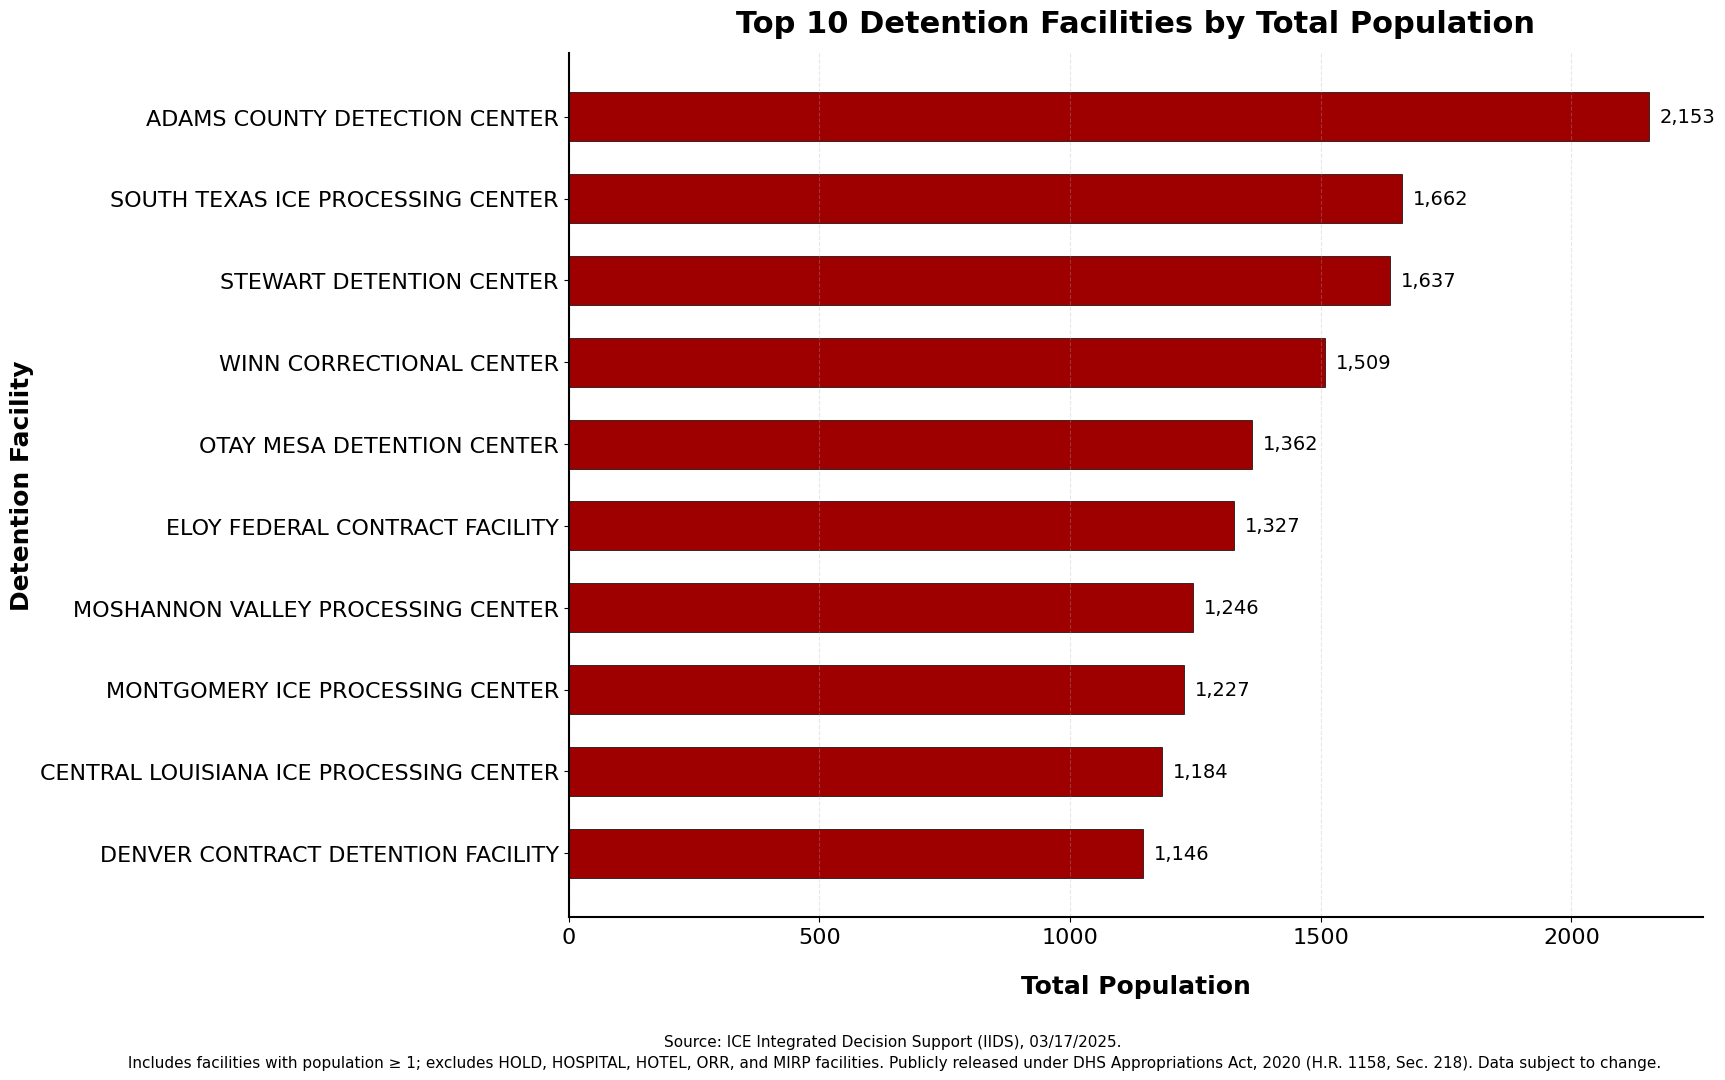

In [32]:


# -----------------------------
# Visualization (Bar Chart)
# -----------------------------

plt.figure(figsize=(18, 12))

bars = plt.barh(
    top_10_largest_detention["Name"],
    top_10_largest_detention["Total Population"],
    height=0.6,
    color="#9e0000",
    edgecolor="black",
    linewidth=0.5
)

#keeping the largest one at the top
plt.gca().invert_yaxis()


plt.xlabel("Total Population",fontsize=18,labelpad=20,fontweight="bold")
plt.ylabel("Detention Facility",fontsize=18,fontweight="bold")
plt.title("Top 10 Detention Facilities by Total Population",fontsize=22,fontweight="bold",pad=15,loc="center")


#add the tick label size
plt.gca().tick_params(axis='y', labelsize=16)
plt.gca().tick_params(axis='x', labelsize=16)


max_val = top_10_largest_detention["Total Population"].max()


# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max(top_10_largest_detention["Total Population"]) * 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width):,}",
        va="center",
        ha="left",
        fontsize=14
    )
#Add subtle gridlines

plt.grid(axis="x", linestyle="--", alpha=0.3)



# Adjust plot spines for neatline
ax = plt.gca()
ax.spines['top'].set_visible(False)      # remove top line
ax.spines['right'].set_visible(False)    # remove right line
ax.spines['left'].set_linewidth(1.5)     # left spine
ax.spines['bottom'].set_linewidth(1.5) 

#manual adjustmenr for nice spacing
plt.subplots_adjust(
    left=0.32,   # more space for long facility names
    right=0.95,
    top=0.90,
    bottom=0.10
)

plt.figtext(
    0.5, 0.06,
    "Source: ICE Integrated Decision Support (IIDS), 03/17/2025.\n "
    "Includes facilities with population ≥ 1; excludes HOLD, HOSPITAL, HOTEL, ORR, and MIRP facilities. "
    "Publicly released under DHS Appropriations Act, 2020 (H.R. 1158, Sec. 218). Data subject to change.",
    ha="center",
    fontsize=11,
    wrap=True,
    linespacing=1.5
),

plt.subplots_adjust(bottom=0.18)
plt.savefig("data/top_10_detention_facilities.png", dpi=900,)
plt.show()                   
